<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

# Atelier en classe : 31 janvier 2024 #
### Discussion interdisciplinaire de sujets en probablilité & statistiques ###

**Quelques fondements de mathématiques statistiques:** par exemple bien définir variables aléatoires, échantillon et population totale, estimateurs, fonction de distribution cumulative (répartition), densité de probabilité, moments, etc. - **Programme GPH**

**Les distributions statistiques de particules indiscernables:** en particulier celle de Fermi-Dirac avec les notions de potentiel chimique et d’occupation des états en fonction de la température, en analogie avec le remplissage selon le principe principe d’Aufbau introduit en classe pour les atomes à température nulle. - **Programme PHY**

**_Un point de bonus sera accordé à tous les étudiantes et étudiants qui participeront à l'atelier pour discuter des sujets ci-dessus et débuter le travail de la première partie ci-dessous._**

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `TDSrevision-2Dsimulation.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leurs trajectoires ballistiques. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude de la dynamique des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `TDSrevision-2Dsimulation.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [1]:
%run TDS-2Dsimulation_H24.py
#Pour lancer la simulation, exécutez le script pour démarrer la simulation 2D.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour trouver la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ et l'imprimer avec la fonction `print()` dans la cellule qui suit. 

In [2]:
# Importation de la bibliothèque numpy
import numpy as np

# Calcul de la moyenne du carré de la quantité de mouvement de toutes les sphères
moyenne_p_carree = np.mean([mag2(vector) for vector in p])

# Affichage du résultat
print("La moyenne du carré de la quantité de mouvement de toutes les sphères est de {:.5} (kg m/s)².".format(moyenne_p_carree))

La moyenne du carré de la quantité de mouvement de toutes les sphères est de 8.4e-47 (kg m/s)².



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ répartissant l'énergie également sur chaque degré de liberté ici en translation seulement, d'où au total pour $i=1,2\text{ ou } 3$ dimensions d'espace réel
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=i\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [3]:
# Calcul de la température du gaz de sphères dures à la fin de la simulation avec i = 2 (2D)
Tfin = moyenne_p_carree / (2 * mass * k)
print("La température du gaz de sphères dures à la fin de la simulation est de {:.5} K.".format(Tfin))
# Calcul de la différence entre la température initiale et la température finale
DeltaT = Tfin - T
print("La différence entre la température initiale et la température finale est de {:.5} K.".format(DeltaT))

La température du gaz de sphères dures à la fin de la simulation est de 450.0 K.
La différence entre la température initiale et la température finale est de 150.0 K.


**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [6]:
def TrackParticule(particule):
    global valeurs_f
    
    # Initialisation des listes nécessaires
    temps_final = []
    v = []
    t = []
    d = []

    # Calcul des quantités de mouvement de la particule
    qte_mvt_part = np.array([sous_liste[particule - 1] for sous_liste in qte_mvt if sous_liste])

    # Parcours des collisions
    for index, paire in enumerate(paire_collision):
        if particule in paire:
            t.append(itr_collisions[index])
            # Calcul des temps finaux entre les collisions
            temps_final = [0] + [(t[i] - t[i-1]) * dt for i in range(1, len(t))]

    # Calcul des vitesses aux instants des collisions
    for i in t:
        v.append(qte_mvt_part[i] / mass)

    # Calcul des distances parcourues entre les collisions
    for i in range(len(v)):
        d.append(mag(v[i]) * temps_final[i])

    # Affectation du résultat à la variable globale
    valeurs_f = (v, d, temps_final)
#TrackParticule(0)

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [7]:
# Calcul du temps de collision moyen
tau = np.mean(valeurs_f[2])

# Calcul du libre parcours moyen
l_moy = np.mean(valeurs_f[1])

# Affichage des résultats
print("Le libre parcours moyen est de {:.5} m.".format(l_moy))
print("Le temps de collision est de {:.5} s.".format(tau))

Le libre parcours moyen est de 0.058723 m.
Le temps de collision est de 4.8145e-05 s.


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [14]:
# Les valeurs de vitesse de la particule ont été récupérées du numéro 3, où la relation p = mv a été utilisée.
v = valeurs_f[0]
# Calcul de la vitesse moyenne de la particule
vitesse_moy = np.mean(v)
print("La vitesse moyenne de la particule est {} m/s.".format(vitesse_moy))

La vitesse moyenne de la particule est <8.01038, -62.7188, 0> m/s.


**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

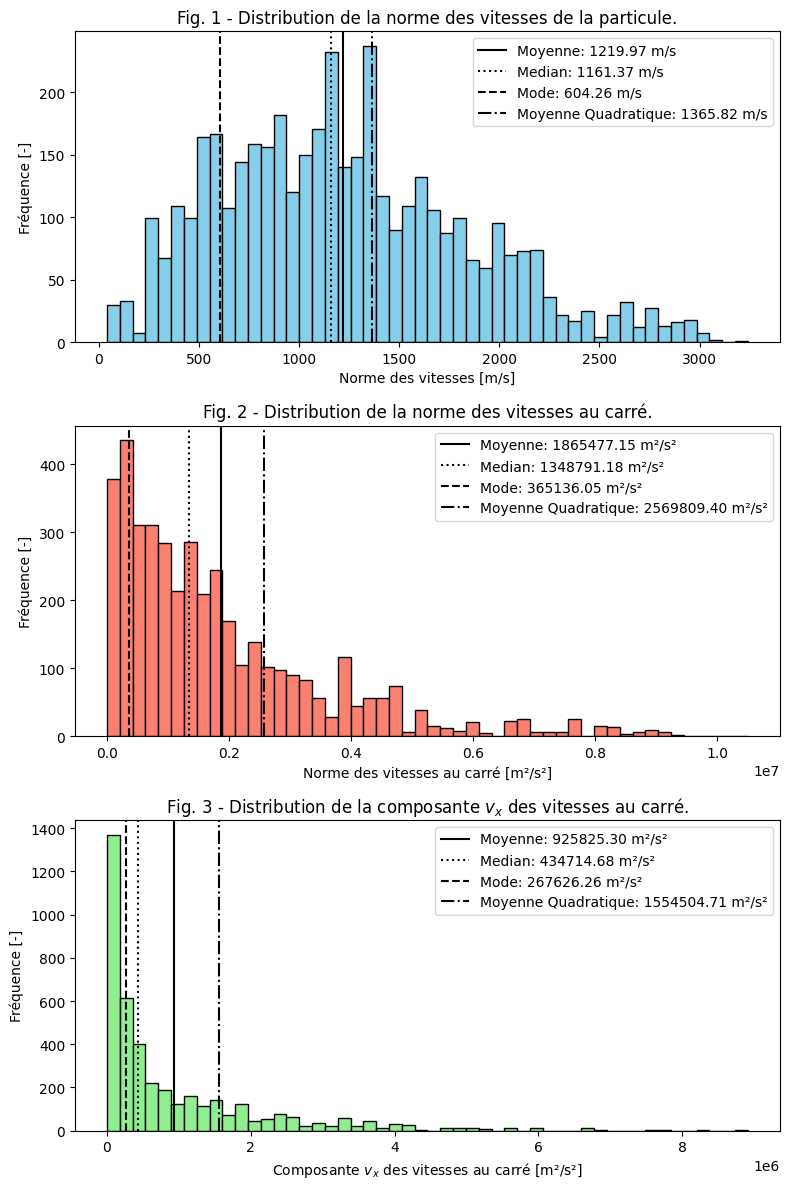

In [15]:
from scipy.stats import mode

norm_v = []
carre_v = []
composante_vx = []


# Calcul des normes pour chaque vecteur de vitesse
for vector in v:
    norm_v.append(mag(vector))
# Calcul du carré
    carre_v = [norm ** 2 for norm in norm_v]
# Extraction de la composante x pour chaque vecteur de vitesse
    composante_vx.append(vector.x**2)

# Calcul de la moyenne, le mode, la médiane et la moyenne quadratique

# Convertir les listes en tableaux numpy pour faciliter les calculs statistiques
norm_v = np.array(norm_v)
carre_v = np.array(carre_v)
composante_vx = np.array(composante_vx)

# Calcul de la moyenne
moyenne_norm_v = np.mean(norm_v)
moyenne_carre_v = np.mean(carre_v)
moyenne_composante_vx = np.mean(composante_vx)

# Calcul du mode
mode_norm_v = stats.mode(norm_v, keepdims=True)[0][0]
mode_carre_v = stats.mode(carre_v, keepdims=True)[0][0]
mode_composante_vx = stats.mode(composante_vx, keepdims=True)[0][0]

# Calcul de la médiane
median_norm_v = np.median(norm_v)
median_carre_v = np.median(carre_v)
median_composante_vx = np.median(composante_vx)

# Calcul de la moyenne quadratique
moyenne_quad_norm_v = np.sqrt(np.mean(norm_v ** 2))
moyenne_quad_carre_v = np.sqrt(np.mean(carre_v ** 2))
moyenne_quad_composante_vx = np.sqrt(np.mean(composante_vx ** 2))

fig, axs = plt.subplots(3, figsize=(8, 12)) 

# Histogramme de la norme
axs[0].hist(norm_v, bins=50, color='skyblue', edgecolor='black')
axs[0].set_title('Fig. 1 - Distribution de la norme des vitesses de la particule.')
axs[0].set_xlabel('Norme des vitesses [m/s]')
axs[0].set_ylabel('Fréquence [-]')

axs[0].axvline(x=moyenne_norm_v, color='black', linestyle='solid', label=f'Moyenne: {moyenne_norm_v:.2f} m/s')
axs[0].axvline(x=median_norm_v, color='black', linestyle='dotted', label=f'Median: {median_norm_v:.2f} m/s')
axs[0].axvline(x=mode_norm_v, color='black', linestyle='dashed', label=f'Mode: {mode_norm_v:.2f} m/s')
axs[0].axvline(x=moyenne_quad_norm_v, color='black', linestyle='dashdot', label=f'Moyenne Quadratique: {moyenne_quad_norm_v:.2f} m/s')

axs[0].legend()

# Histogramme de la norme au carré
axs[1].hist(carre_v, bins=50, color='salmon', edgecolor='black')
axs[1].set_title('Fig. 2 - Distribution de la norme des vitesses au carré.')
axs[1].set_xlabel('Norme des vitesses au carré [m²/s²]')
axs[1].set_ylabel('Fréquence [-]')

axs[1].axvline(x=moyenne_carre_v, color='black', linestyle='solid', label=f'Moyenne: {moyenne_carre_v:.2f} m²/s²')
axs[1].axvline(x=median_carre_v, color='black', linestyle='dotted', label=f'Median: {median_carre_v:.2f} m²/s²')
axs[1].axvline(x=mode_carre_v, color='black', linestyle='dashed', label=f'Mode: {mode_carre_v:.2f} m²/s²')
axs[1].axvline(x=moyenne_quad_carre_v, color='black', linestyle='dashdot', label=f'Moyenne Quadratique: {moyenne_quad_carre_v:.2f} m²/s²')

axs[1].legend()

# Histogramme de la composante vx au carré
axs[2].hist(composante_vx, bins=50, color='lightgreen', edgecolor='black')
axs[2].set_title(r'Fig. 3 - Distribution de la composante $v_{x}$ des vitesses au carré.')
axs[2].set_xlabel(r'Composante $v_{x}$ des vitesses au carré [m²/s²]')
axs[2].set_ylabel('Fréquence [-]')

axs[2].axvline(x=moyenne_composante_vx, color='black', linestyle='solid', label=f'Moyenne: {moyenne_composante_vx:.2f} m²/s²')
axs[2].axvline(x=median_composante_vx, color='black', linestyle='dotted', label=f'Median: {median_composante_vx:.2f} m²/s²')
axs[2].axvline(x=mode_composante_vx, color='black', linestyle='dashed', label=f'Mode: {mode_composante_vx:.2f} m²/s²')
axs[2].axvline(x=moyenne_quad_composante_vx, color='black', linestyle='dashdot', label=f'Moyenne Quadratique: {moyenne_quad_composante_vx:.2f} m²/s²')

axs[2].legend()

plt.tight_layout()

plt.show()


**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

In [ ]:

#

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour faciliter la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le code adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.